[1000, 3000, 5000, 7000]
Testing frames 720 to 1285 (n=57)
Testing frames 2719 to 3281 (n=57)
Testing frames 4632 to 5283 (n=66)
Testing frames 6701 to 7453 (n=76)


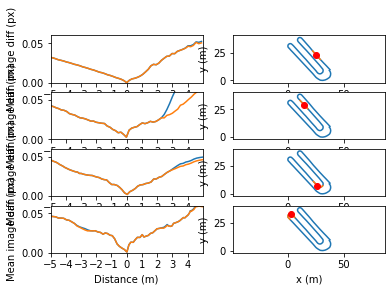

In [1]:
import matplotlib.pyplot as plt
import navbench

MAX_DIST  = 5 # metres
IMSIZE    = (360, 110)
FRSKIP    = 10
FRAMES    = range(1000, 9000, 2000)
RIDF_STEP = 2

print(list(FRAMES))

# We're currently just comparing this one dataset with itself
db = navbench.Database('newton/route1', size=IMSIZE, step=FRSKIP)

fig, ax = plt.subplots(ncols=2, nrows=len(FRAMES))
for i in range(len(FRAMES)):
    db.plot_idfs(ax[i], FRAMES[i], MAX_DIST, RIDF_STEP)

# If we don't do this then the plots overlap
fig.tight_layout()

plt.show()